<a href="https://colab.research.google.com/github/debi201326/AAI_Practical/blob/main/SDL_Practical_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing Regularization, Early Stopping, and Dropout in a Perceptron Model to predict student exam scores based on study hours, class attendance, and previous grades.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
df = pd.read_csv('/content/student_exam_scores.csv')

print("Dataset Preview:")
print(df.head())

Dataset Preview:
  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  


In [15]:
X = df[['hours_studied', 'attendance_percent', 'previous_scores']]
y = df['exam_score']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,), kernel_regularizer=l2(0.001)),  # L2 Regularization
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='linear')  # Regression output layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 1127.0830 - mse: 1127.0334 - val_loss: 1228.8135 - val_mse: 1228.7639
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1157.4458 - mse: 1157.3961 - val_loss: 1209.4650 - val_mse: 1209.4152
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1116.4493 - mse: 1116.3994 - val_loss: 1186.8813 - val_mse: 1186.8311
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1026.3268 - mse: 1026.2765 - val_loss: 1160.3188 - val_mse: 1160.2681
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1039.8201 - mse: 1039.7692 - val_loss: 1128.8649 - val_mse: 1128.8132
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1028.3541 - mse: 1028.3022 - val_loss: 1091.4849 - val_mse: 1091.4321
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 984.9580 - mse: 984.9050 - val_loss: 1047.5663 - val_mse: 1047.5121
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 947.8242 - mse: 947.7697 - val_loss: 995.5225 - val

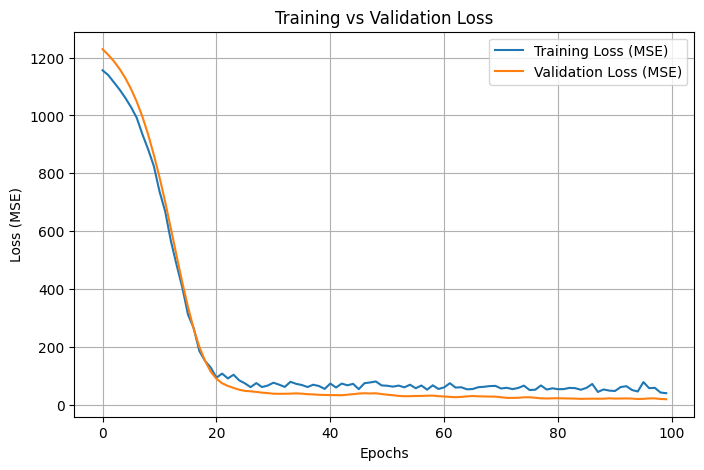

In [20]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [21]:
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


In [22]:
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {test_mse:.4f}")
print(f"R² Score: {r2:.4f}")


Test MSE: 15.8505
R² Score: 0.7013


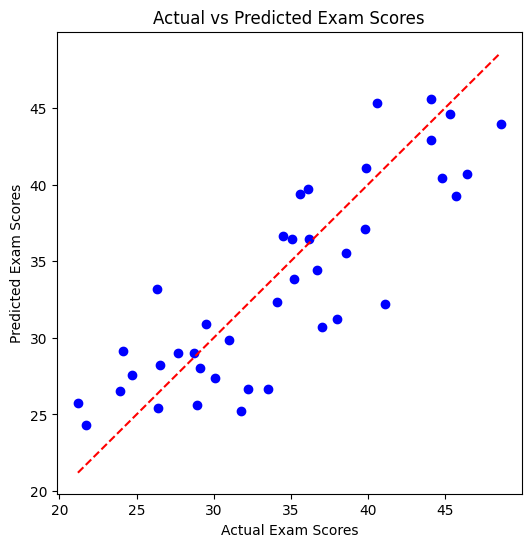

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.show()


In [24]:
viz_df = pd.DataFrame({
    'study_hours': X_test[:, 0],
    'class_attendance': X_test[:, 1],
    'previous_grade': X_test[:, 2],
    'predicted_exam_score': y_pred.flatten()
})

plt.figure(figsize=(15, 4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>